In [1]:
## Importing the libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

from sklearn import model_selection,metrics

from sklearn.model_selection import cross_val_score,train_test_split

import seaborn as sns

import matplotlib.pyplot as plt

import scipy.stats as stats

In [4]:
test_Data=pd.read_csv('Test_dataset.csv')

In [5]:
test_Data.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,...,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,...,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,...,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,...,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,...,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [6]:
df_train = pd.read_csv('Train_dataset.csv')
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [7]:
## Checking for the null values

df_train.isnull().sum()

Registration Number                 0
Annual Turnover                     0
Cuisine                             0
City                                0
Restaurant Location                 0
Opening Day of Restaurant           0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         212
Live Music Rating                 765
Comedy Gigs 

In [8]:
df_train.shape

(3493, 34)

In [9]:
test_Data.shape

(500, 33)

In [10]:
test_Data.isna().sum()

Registration Number                0
Cuisine                            0
City                               0
Restaurant Location                0
Opening Day of Restaurant          0
Facebook Popularity Quotient       0
Endoresed By                       0
Instagram Popularity Quotient      0
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Resturant Tier                     0
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating         34
Live Music Rating                102
Comedy Gigs Rating               370
Value Deals Rating               385
L

#### Annual Turn Over

In [11]:
target=df_train['Annual Turnover']
df_train.drop('Annual Turnover',axis=1,inplace=True)

#### Registration Number

In [12]:
len(df_train['Registration Number'].unique())

3493

In [13]:
df_train.drop('Registration Number',axis=1,inplace=True)

In [14]:
reg_no_test=test_Data[['Registration Number']]
test_Data.drop('Registration Number',axis=1,inplace=True)

#### 'Live Sports Rating','Comedy Gigs Rating','Value Deals Rating'

In [15]:
df_train['Live Sports Rating'].unique()

array([nan,  4.,  3.,  2.,  5.,  6.])

In [16]:
df_train['Comedy Gigs Rating'].unique()

array([nan,  4.,  2.,  3.,  1.,  5.,  6.])

In [17]:
df_train['Value Deals Rating'].unique()

array([nan,  4.,  3.,  5.,  2.,  1.,  6.,  7.])

In [18]:
# dropping above 3 columns since 90 percent of the data is missing
df_train.drop(['Live Sports Rating','Comedy Gigs Rating','Value Deals Rating'],axis=1,inplace=True)

In [19]:
# dropping above 3 columns since 90 percent of the data is missing
test_Data.drop(['Live Sports Rating','Comedy Gigs Rating','Value Deals Rating'],axis=1,inplace=True)

In [20]:
len(df_train['City'].unique())

297

In [21]:
len(df_train['Restaurant Location'].unique())

2

#### Opening Day of Restaurant

In [22]:
len(df_train['Opening Day of Restaurant'].unique())

1778

In [23]:
df_train['Opening Day of Restaurant'].unique()

array(['14-02-2009', '29-09-2008', '30-07-2011', ..., '07-06-2007',
       '27-06-2013', '15-03-2007'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
#converting it into date time
df_train['Opening Day of Restaurant']=pd.to_datetime(df_train['Opening Day of Restaurant'])

df_train['opening_year']=df_train['Opening Day of Restaurant'].dt.year
df_train['opening_month']=df_train['Opening Day of Restaurant'].dt.month
df_train['opening_day']=df_train['Opening Day of Restaurant'].dt.day


df_train.drop('Opening Day of Restaurant',axis=1,inplace=True)

df_train['opening_month']=df_train['opening_month'].astype('int64')

#converting it into date time
test_Data['Opening Day of Restaurant']=pd.to_datetime(test_Data['Opening Day of Restaurant'])
test_Data['opening_year']=test_Data['Opening Day of Restaurant'].dt.year
test_Data['opening_month']=test_Data['Opening Day of Restaurant'].dt.month
test_Data['opening_day']=test_Data['Opening Day of Restaurant'].dt.day
test_Data.drop('Opening Day of Restaurant',axis=1,inplace=True)


#### Restaurant Type

In [26]:
len(df_train['Restaurant Type'].unique())

4

In [27]:
df_train['Restaurant Type'].unique()

array(['Bar', 'Caffee', 'Gastro Bar', 'Buffet/Family Restaurant'],
      dtype=object)

In [28]:
len(test_Data['Restaurant Type'].unique())

4

In [29]:
data=pd.DataFrame(df_train['Restaurant Type'])
data['revenue']=target
t1=data[data['Restaurant Type']=='Bar']['revenue']
t2=data[data['Restaurant Type']=='Caffee']['revenue']
t3=data[data['Restaurant Type']=='Gastro Bar']['revenue']
t4=data[data['Restaurant Type']=='Buffet/Family Restaurant']['revenue']


stats.f_oneway(t1,t2,t3,t4)

F_onewayResult(statistic=2.5599162499034507, pvalue=0.05329016750709972)

#### Restaurant Theme

In [30]:
len(df_train['Restaurant Theme'].unique())

34

In [31]:
df_train['Restaurant Theme'].unique()

array(['Arabian', 'Greek', "90's", 'Nature', 'Parsi', 'English',
       'Chinese', 'Delicio', 'Molino', 'Petit', 'Downtown', 'Italica',
       'Bettaso', 'Bakery', 'Mise En', 'Umami', 'Moonrise', 'Belise',
       'Cinnamon', 'Resca', 'TheGem', 'Benedicta', 'Marco', 'LaCuisine',
       'Spoon', 'Grand', 'Picante', 'Carbone', 'Flavors', 'Cafepro',
       'Savory', 'Piquant', 'Sage', 'Ambiance'], dtype=object)

In [32]:
len(test_Data['Restaurant Theme'].unique())

18

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
df_train['Restaurant Theme']=df_train['Restaurant Theme'].apply(lambda city : city.upper())
test_Data['Restaurant Theme']=test_Data['Restaurant Theme'].apply(lambda city : city.upper())

df_train['Restaurant Theme']=le.fit_transform(df_train['Restaurant Theme'])

test_Data['Restaurant Theme']=le.transform(test_Data['Restaurant Theme'])

#### City

In [35]:
len(df_train.City.unique())

297

In [36]:
len(test_Data.City.unique())

97

In [37]:
df_train['City']=df_train['City'].apply(lambda city : city.upper())
test_Data['City']=test_Data['City'].apply(lambda city : city.upper())

In [38]:
df_train.drop('City',inplace=True,axis=1)
test_Data.drop('City',inplace=True,axis=1)

#### Endorsed by

In [39]:
df_train['Endorsed By'].unique()

array(['Not Specific', 'Tier A Celebrity', 'Local Celebrity'],
      dtype=object)

In [40]:
test_Data['Endoresed By'].unique()

array(['Tier A Celebrity', 'Not Specific', 'Local Celebrity'],
      dtype=object)

In [41]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [42]:
data=pd.DataFrame(df_train['Endorsed By'])
data['revenue']=target
t1=data[data['Endorsed By']=='Tier A Celebrity']['revenue']
t2=data[data['Endorsed By']=='Not Specific']['revenue']
t3=data[data['Endorsed By']=='Local Celebrity']['revenue']

stats.f_oneway(t1,t2,t3)

F_onewayResult(statistic=5.774935113353456, pvalue=0.0031341404982070382)

#### Fire Audit

In [43]:
df_train['Fire Audit'].unique()

array([1, 0], dtype=int64)

In [44]:
test_Data['Fire Audit'].unique()

array([1, 0], dtype=int64)

In [45]:
df_train['Fire Audit']=df_train['Fire Audit'].astype('object')
test_Data['Fire Audit']=test_Data['Fire Audit'].astype('object')

In [46]:
data=pd.DataFrame(df_train['Fire Audit'])
data['revenue']=target
t1=data[data['Fire Audit']==1]['revenue']
t2=data[data['Fire Audit']==0]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=1.8366506458900105, pvalue=0.06634645904267522)

In [47]:
# insignificant feature
df_train.drop('Fire Audit',axis=1,inplace=True)
test_Data.drop('Fire Audit',axis=1,inplace=True)

#### Liquor License Obtained

In [48]:
df_train['Liquor License Obtained'].unique()

array([1, 0], dtype=int64)

In [49]:
test_Data['Liquor License Obtained'].unique()

array([1, 0], dtype=int64)

In [50]:
df_train['Liquor License Obtained']=df_train['Liquor License Obtained'].astype('object')
test_Data['Liquor License Obtained']=test_Data['Liquor License Obtained'].astype('object')

In [51]:
data=pd.DataFrame(df_train['Liquor License Obtained'])
data['revenue']=target
t1=data[data['Liquor License Obtained']==1]['revenue']
t2=data[data['Liquor License Obtained']==0]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=1.4859242314054586, pvalue=0.13738946115201162)

In [52]:
df_train.drop('Liquor License Obtained',axis=1,inplace=True)
test_Data.drop('Liquor License Obtained',axis=1,inplace=True)

#### Situated in a Multi Complex

In [53]:
df_train['Situated in a Multi Complex'].unique()

array([1, 0], dtype=int64)

In [54]:
test_Data['Situated in a Multi Complex'].unique()

array([1, 0], dtype=int64)

In [55]:
df_train['Situated in a Multi Complex']=df_train['Situated in a Multi Complex'].astype('object')
test_Data['Situated in a Multi Complex']=test_Data['Situated in a Multi Complex'].astype('object')

In [56]:
data=pd.DataFrame(df_train['Situated in a Multi Complex'])
data['revenue']=target
t1=data[data['Situated in a Multi Complex']==1]['revenue']
t2=data[data['Situated in a Multi Complex']==0]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=-3.365832083952008, pvalue=0.0007713795163565877)

#### Dedicated Parking'

In [57]:
df_train['Dedicated Parking'].unique()

array([0, 1], dtype=int64)

In [58]:
test_Data['Dedicated Parking'].unique()

array([1, 0], dtype=int64)

In [59]:
df_train['Dedicated Parking']=df_train['Dedicated Parking'].astype('object')
test_Data['Dedicated Parking']=test_Data['Dedicated Parking'].astype('object')

In [60]:
data=pd.DataFrame(df_train['Dedicated Parking'])
data['revenue']=target
t1=data[data['Dedicated Parking']==1]['revenue']
t2=data[data['Dedicated Parking']==0]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=1.4338471765221668, pvalue=0.15170543786718912)

In [61]:
#not significant feature 
df_train.drop('Dedicated Parking',axis=1,inplace=True)
test_Data.drop('Dedicated Parking',axis=1,inplace=True)

#### Open Sitting Available

In [62]:
df_train['Open Sitting Available'].unique()

array([1, 0], dtype=int64)

In [63]:
test_Data['Open Sitting Available'].unique()

array([0, 1], dtype=int64)

In [64]:
df_train['Open Sitting Available']=df_train['Open Sitting Available'].astype('object')
test_Data['Open Sitting Available']=test_Data['Open Sitting Available'].astype('object')

In [65]:
data=pd.DataFrame(df_train['Open Sitting Available'])
data['revenue']=target
t1=data[data['Open Sitting Available']==1]['revenue']
t2=data[data['Open Sitting Available']==0]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=0.06359374834497598, pvalue=0.9492973506232871)

In [66]:
#insignificant
df_train.drop('Open Sitting Available',axis=1,inplace=True)
#insignificant
test_Data.drop('Open Sitting Available',axis=1,inplace=True)

#### Resturant Tier

In [67]:
df_train['Resturant Tier'].unique()

array([ 2.,  1., nan])

In [68]:
test_Data['Resturant Tier'].unique()

array([2, 1], dtype=int64)

In [69]:
df_train['Resturant Tier']=df_train['Resturant Tier'].astype('object')
test_Data['Resturant Tier']=test_Data['Resturant Tier'].astype('object')

#### Restaurant Zomato Rating

In [70]:
df_train['Restaurant Zomato Rating'].unique()

array([3, 0, 4, 2, 1, 5], dtype=int64)

In [71]:
test_Data['Restaurant Zomato Rating'].unique()

array([3, 4, 2, 5, 1], dtype=int64)

#### Restaurant City Tier

In [72]:
df_train['Restaurant City Tier'].unique()

array([0, 1], dtype=int64)

In [73]:
df_train['Restaurant City Tier']=df_train['Restaurant City Tier'].astype('object')
test_Data['Restaurant City Tier']=test_Data['Restaurant City Tier'].astype('object')

In [74]:
data=pd.DataFrame(df_train['Restaurant City Tier'])
data['revenue']=target
t1=data[data['Restaurant City Tier']==1]['revenue']
t2=data[data['Restaurant City Tier']==0]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=0.5880300273393511, pvalue=0.5565501743935863)

In [75]:
#insignificant
df_train.drop('Restaurant City Tier',axis=1,inplace=True)
#insignificant
test_Data.drop('Restaurant City Tier',axis=1,inplace=True)

#### Order Wait Time

In [76]:
df_train['Order Wait Time'].unique()

array([ 2,  6,  7, 10,  8,  4,  9,  1,  3,  5], dtype=int64)

In [77]:
test_Data['Order Wait Time'].unique()

array([10,  6,  7,  1,  5,  2,  3,  9,  4,  8], dtype=int64)

In [78]:
df_train['Order Wait Time']=df_train['Order Wait Time'].astype('object')
test_Data['Order Wait Time']=test_Data['Order Wait Time'].astype('object')

#### Staff Responsivness

In [79]:
df_train['Staff Responsivness'].unique()

array([5, 6, 4, 3, 7, 2, 8, 1], dtype=int64)

In [80]:
test_Data['Staff Responsivness'].unique()

array([5, 4, 6, 3, 7, 2], dtype=int64)

#### Value for Money

In [81]:
df_train['Value for Money'].unique()

array([5, 6, 4, 3, 2, 7, 1], dtype=int64)

In [82]:
test_Data['Value for Money'].unique()

array([3, 5, 6, 4, 2, 7], dtype=int64)

#### Hygiene Rating

In [83]:
df_train['Hygiene Rating'].unique()

array([5, 7, 3, 6, 4, 2, 8, 1, 9], dtype=int64)

In [84]:
test_Data['Hygiene Rating'].unique()

array([5, 6, 7, 4, 3, 2, 8, 1], dtype=int64)

#### Live Music Rating

In [85]:
df_train['Live Music Rating'].unique()

array([ 4., nan,  3.,  6.,  7.,  5.,  1.,  8.,  2.])

In [86]:
test_Data['Live Music Rating'].unique()

array([nan,  3.,  6.,  4.,  2.,  5.,  7.,  1.])

#### Ambience

In [87]:
df_train['Ambience'].unique()

array([ 8.,  5.,  7., nan,  6., 10.,  4.,  2.,  9.,  0.,  1.,  3.])

In [88]:
test_Data['Ambience'].unique()

array([ 5,  7,  9,  6,  4,  8, 10,  1,  2,  0,  3], dtype=int64)

#### Lively

In [89]:
df_train['Lively'].unique()

array([ 8,  7, 10,  6,  5,  9,  2,  3,  4,  1,  0], dtype=int64)

In [90]:
test_Data['Lively'].unique()

array([ 2,  8,  7,  4,  6,  5, 10,  9,  3,  0,  1], dtype=int64)

In [91]:
df_train['Lively']=df_train['Lively'].astype('object')
test_Data['Lively']=test_Data['Lively'].astype('object')

#### Service

In [92]:
df_train['Service'].unique()

array([ 6,  7,  5,  4,  2,  0,  3,  1,  9,  8, 10], dtype=int64)

In [93]:
test_Data['Service'].unique()

array([ 2,  5,  6,  7,  3,  4,  8,  1,  9, 10,  0], dtype=int64)

In [94]:
df_train['Service']=df_train['Service'].astype('object')
test_Data['Service']=test_Data['Service'].astype('object')

#### Comfortability

In [95]:
test_Data['Comfortablility'].unique()

array([ 6,  1,  4,  7,  5,  8,  2,  3,  0, 10,  9], dtype=int64)

In [96]:
df_train['Comfortablility'].unique()

array([ 6,  3,  2,  4,  0,  5,  7,  1,  9,  8, 10], dtype=int64)

In [97]:
df_train['Comfortablility']=df_train['Comfortablility'].astype('object')
test_Data['Comfortablility']=test_Data['Comfortablility'].astype('object')

#### Privacy

In [98]:
df_train['Privacy'].unique()

array([ 6,  8,  5,  4,  9,  7,  1,  0, 10,  3,  2], dtype=int64)

In [99]:
test_Data['Privacy'].unique()

array([ 0,  8,  5,  7,  3,  9,  4,  6, 10,  2,  1], dtype=int64)

In [100]:
df_train['Privacy']=df_train['Privacy'].astype('object')
test_Data['Privacy']=test_Data['Privacy'].astype('object')

#### Cuisine

In [101]:
len(df_train['Cuisine'].unique())

20

In [102]:
len(test_Data['Cuisine'].unique())

20

In [103]:
data=df_train[['Cuisine']].copy(deep=True)
data['revenue']=target
m1=ols('revenue~C(Cuisine)',data=data).fit()
anova_lm(m1)

,df,sum_sq,mean_sq,F,PR(>F)
C(Cuisine),19.0,4.475548e+16,2.355552e+15,5.138028,2.282704e-12
Residual,3473.0,1.592212e+18,4.584544e+14,NaN,NaN


In [104]:
k=le.fit_transform(df_train['Cuisine'])
df_train['Cuisine']=k

test_Data['Cuisine']=le.transform(test_Data['Cuisine'])

#### Restaurant Location

In [105]:
df_train['Restaurant Location'].unique()

array(['Near Business Hub', 'Near Party Hub'], dtype=object)

In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cuisine                        3493 non-null   int32  
 1   Restaurant Location            3493 non-null   object 
 2   Facebook Popularity Quotient   3394 non-null   float64
 3   Endorsed By                    3493 non-null   object 
 4   Instagram Popularity Quotient  3437 non-null   float64
 5   Situated in a Multi Complex    3493 non-null   object 
 6   Resturant Tier                 3444 non-null   object 
 7   Restaurant Type                3493 non-null   object 
 8   Restaurant Theme               3493 non-null   int32  
 9   Restaurant Zomato Rating       3493 non-null   int64  
 10  Order Wait Time                3493 non-null   object 
 11  Staff Responsivness            3493 non-null   int64  
 12  Value for Money                3493 non-null   i

In [107]:
test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cuisine                        500 non-null    int32  
 1   Restaurant Location            500 non-null    object 
 2   Facebook Popularity Quotient   500 non-null    float64
 3   Endoresed By                   500 non-null    object 
 4   Instagram Popularity Quotient  500 non-null    float64
 5   Situated in a Multi Complex    500 non-null    object 
 6   Resturant Tier                 500 non-null    object 
 7   Restaurant Type                500 non-null    object 
 8   Restaurant Theme               500 non-null    int32  
 9   Restaurant Zomato Rating       500 non-null    int64  
 10  Order Wait Time                500 non-null    object 
 11  Staff Responsivness            500 non-null    int64  
 12  Value for Money                500 non-null    int

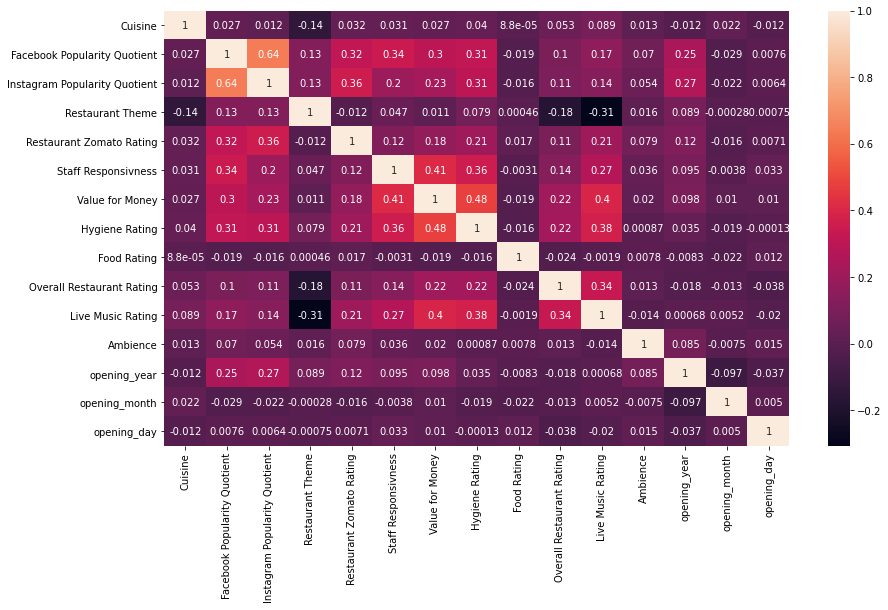

In [112]:
plt.figure(figsize=(14,8))
sns.heatmap(df_train.corr(),annot=True)

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


In [116]:
knnimputer=KNNImputer(n_neighbors=5)

In [117]:
categorical=df_train.select_dtypes(include='object')
number=df_train.select_dtypes(include=np.number)

dummy_categorical=pd.get_dummies(categorical,drop_first=True)

sc_number=sc.fit_transform(number)
sc_number=pd.DataFrame(sc_number,columns=number.columns)

X0=pd.concat([dummy_categorical,sc_number],axis=1)
y=target

X=knnimputer.fit_transform(X0)

In [118]:
#test data
categorical_test=test_Data.select_dtypes(include='object')
number_test=test_Data.select_dtypes(include=np.number)
dummy_categorical_test=pd.get_dummies(categorical_test,drop_first=True)

sc_number_test=sc.transform(number_test)
sc_number_test=pd.DataFrame(sc_number_test,columns=number.columns)

X0_test=pd.concat([dummy_categorical_test,sc_number_test],axis=1)


X_test_set=knnimputer.transform(X0_test)

In [ ]:
X.shape

In [ ]:
X_test_set.shape

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=110)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lir=LinearRegression(fit_intercept=True)


lir.fit(X_train,y_train)
train_pred_lir=lir.predict(X_train)
test_pred_lir=lir.predict(X_test)
print('rmse train',np.sqrt(metrics.mean_squared_error(y_train,train_pred_lir)))
print('rmse test',np.sqrt(metrics.mean_squared_error(y_test,test_pred_lir)))

In [ ]:
df_x=pd.DataFrame(X,columns=X0.columns)
import statsmodels.api as sm
Xc=sm.add_constant(df_x)
model=sm.OLS(y,Xc).fit()

In [ ]:
y1=model.predict(Xc)
rmse=np.sqrt(metrics.mean_squared_error(y,y1))
rmse

In [ ]:
model.summary()

In [ ]:
#selecting the most important features
col=list(Xc.columns)
pmax=1

while len(col)>0:
    x1=Xc[col]
    model=sm.OLS(y,x1).fit()
    p=model.pvalues
    p=p.drop(labels=['const'])
    pmax=max(p)
    feature=p.idxmax()
    if pmax>0.05:
        col.remove(feature)
    else:
        break
print(col)

In [ ]:
m2=sm.OLS(y,Xc[col]).fit()

In [ ]:
y2=m2.predict(Xc[col])
rmse=np.sqrt(metrics.mean_squared_error(y,y2))
rmse

In [ ]:
m2.summary()

In [ ]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [ ]:
params={'alpha':[.001,.01,.1,1,10,100,1000]}


In [ ]:
ridge=Ridge(fit_intercept=True)
grid=GridSearchCV(estimator=ridge,
                 param_grid=params,
                 cv=10,
                 scoring='r2')
grid.fit(X_train,y_train)

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_score_

In [ ]:
ridge=Ridge(alpha=100,fit_intercept=True)
ridge.fit(X_train,y_train)

train_pred_ridge=ridge.predict(X_train)
test_pred_ridge=ridge.predict(X_test)
print('rmse train',np.sqrt(metrics.mean_squared_error(y_train,train_pred_ridge)))
print('rmse test',np.sqrt(metrics.mean_squared_error(y_test,test_pred_ridge)))

In [ ]:
ridge=Ridge(fit_intercept=True)
grid=GridSearchCV(estimator=ridge,
                 param_grid=params,
                 cv=10,
                 scoring='r2')
grid.fit(X,y)

In [ ]:
grid.best_estimator_

In [ ]:
ridge2=Ridge(alpha=100,fit_intercept=True)
ridge2.fit(X,y)
pred=ridge2.predict(X)

print('rmse ',np.sqrt(metrics.mean_squared_error(y,pred)))


In [ ]:
lir=LinearRegression(fit_intercept=True)


lir.fit(X,y)
pred_lir=lir.predict(X)
 
print('rmse ',np.sqrt(metrics.mean_squared_error(y,pred_lir)))


In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
lir=LinearRegression()
rfe=RFE(estimator=lir,
       n_features_to_select=15)
rfe_model=rfe.fit(X_train,y_train)

In [ ]:
ranking=pd.DataFrame(rfe_model.ranking_,index=X0.columns,columns=['ranking'])
top10=ranking[ranking['ranking']==1].index

#print(top10)

dfX_train=pd.DataFrame(X_train,columns=X0.columns)
dfX_test=pd.DataFrame(X_test,columns=X0.columns)

In [ ]:
lir.fit(dfX_train[top10],y_train)

y1=lir.predict(dfX_test[top10])
print('rmse test',np.sqrt(metrics.mean_squared_error(y1,y_test)))

y2=lir.predict(dfX_train[top10])
print('rmse train',np.sqrt(metrics.mean_squared_error(y2,y_train)))

lir2=LinearRegression()
lir2.fit(df_x[top10],y)


In [ ]:
print('rmse main',np.sqrt(metrics.mean_squared_error(lir2.predict(df_x[top10]),y)))


In [ ]:
X_test_set.shape

In [ ]:
X.shape

In [ ]:
y_test_set=ridge2.predict(X_test_set)

In [ ]:
len(y_test_set)

In [ ]:
regno=reg_no_test['Registration Number']


In [ ]:
submission=pd.DataFrame(regno)
submission['Annual Turnover']=y_test_set

In [ ]:
submission.set_index('Registration Number',inplace=True)

In [ ]:
submission.info()

In [ ]:
submission.to_csv('submission.csv')